<a href="https://colab.research.google.com/github/miroagustin/CienciaDeDatos1Q2025/blob/main/01_Ej_imputacion_de_outliers_bike_buyers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Binning, imputacion, outliers, dummies etc
El siguiente Dataset contiene detalles de 1000 potenciales compradores de bicicletas, realizaremos un análisis exploratorio del mismo, imputando las variables que correspondan.

1. ¿Cuáles de las variables contienen valores nulos?
2. ¿Está Balanceada la variable target 'Purchased Bike'?
3. Imputar los valores nulos de Gender con el valor 'X'.
4. Imputar los valores nulos y outliers de Age con la media.
5. Eliminar los registros con valor nulo en Cars.
6. Generar columnas dummy para las variables Education y Occupation.
7. Definir una estrategia de imputación para las otras variables que corresponda.
8. Finalizar el análisis exploratorio con gráficos del dataset.

In [51]:
import pandas as pd
bike_buyers = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/bike_buyers.csv')

In [52]:
#bike_buyers.describe(include='all')

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
import seaborn as sns
import sys

# **¿Cuáles de las variables contienen valores nulos?**

In [54]:
#¿Cuáles de las variables contienen valores nulos?
#CantNulos = bike_buyers.isnull().sum()                         isna es lo mismo
CantNulos = bike_buyers.isna().sum()/bike_buyers.shape[0]*100   #cant nulos / cant filas * 100
print([ f"{col}: {nulos:.2f}%" for col,nulos in CantNulos.items() if nulos > 0])

['Marital Status: 0.70%', 'Gender: 1.10%', 'Income: 0.60%', 'Children: 0.80%', 'Home Owner: 0.40%', 'Cars: 0.90%', 'Age: 0.70%']


# **¿Está Balanceada la variable target 'Purchased Bike'?**

In [55]:
#¿Está Balanceada la variable target 'Purchased Bike'?
# Cuenta los valores únicos de la variable target
value_counts = bike_buyers['Purchased Bike'].value_counts() #cuenta los yes y los no cuantos son
print(value_counts)

Purchased Bike
No     519
Yes    481
Name: count, dtype: int64


Vemos que la variable Purchased Bike esta balanceada, adicionamos un grafico al final del TP para mejor visualizacion

# **Imputar los valores nulos de Gender con el valor 'X'**

In [57]:
#Imputar los valores nulos de Gender con el valor 'X'
bike_buyers["Gender"] = bike_buyers["Gender"].fillna("X")   #(lo que relleno, True: borra lo de antes | False: devuelve copia)

# **Imputar los valores nulos y outliers de Age con la media.**

Outliers:

In [58]:
#Imputar los valores nulos y outliers de Age con la media.
Q1 = bike_buyers['Age'].quantile(0.25)
Q3 = bike_buyers['Age'].quantile(0.75)
IQR = Q3 - Q1

# Definimos límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculamos la media sin los outliers
mean_without_outliers = bike_buyers[(bike_buyers['Age'] >= lower_bound) & (bike_buyers['Age'] <= upper_bound)]['Age'].mean()


Outliers antes de Imputar

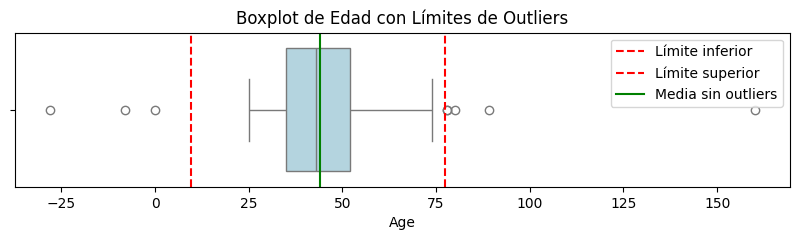

In [59]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=bike_buyers, x='Age', color='lightblue')

# Añadimos líneas para los límites del IQR
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

# Línea para la media sin outliers
plt.axvline(mean_without_outliers, color='green', linestyle='-', label='Media sin outliers')

plt.title('Boxplot de Edad con Límites de Outliers')
plt.legend()
plt.show()

Outliers luego de imputar

In [60]:
# Imputamos los outliers:
bike_buyers.loc[bike_buyers['Age'] < lower_bound, 'Age'] = bike_buyers['Age'].mean()
bike_buyers.loc[bike_buyers['Age'] > upper_bound, 'Age'] = bike_buyers['Age'].mean()

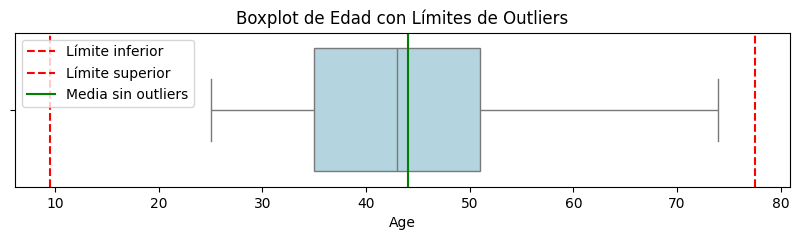

In [61]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=bike_buyers, x='Age', color='lightblue')

# Añadimos líneas para los límites del IQR
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

# Línea para la media sin outliers
plt.axvline(mean_without_outliers, color='green', linestyle='-', label='Media sin outliers')

plt.title('Boxplot de Edad con Límites de Outliers')
plt.legend()
plt.show()

Valores nulos:

In [62]:
#Imputar los valores nulos y outliers de Age con la media.
bike_buyers["Age"] = bike_buyers["Age"].fillna(bike_buyers["Age"].mean())   #(lo que relleno, True: borra lo de antes | False: devuelve copia)

# **Eliminar los registros con valor nulo en Cars.**

In [63]:
#Eliminar los registros con valor nulo en Cars.
bike_buyers = bike_buyers[~bike_buyers["Cars"].isna()]
#CantNulos = bike_buyers.isna().sum()/bike_buyers.shape[0]*100
#print(CantNulos)

# **Generar columnas dummy para las variables Education y Occupation.**

In [64]:
#Generar columnas dummy para las variables Education y Occupation.
bike_buyers = pd.get_dummies(bike_buyers, columns=["Education"], drop_first=True)
bike_buyers = pd.get_dummies(bike_buyers, columns=["Occupation"], drop_first=True)
#print(bike_buyers)

# **Definir una estrategia de imputación para las otras variables que corresponda.**

Identificamos las variables restantes con valores nulo

In [65]:
CantNulos = bike_buyers.isna().sum()/bike_buyers.shape[0]*100   #cant nulos / cant filas * 100
print([ f"{col}: {nulos:.2f}%" for col,nulos in CantNulos.items() if nulos > 0])

['Marital Status: 0.71%', 'Income: 0.61%', 'Children: 0.81%', 'Home Owner: 0.40%']


In [66]:
from IPython.display import display

# Lista de columnas que querés analizar
atributos_a_mostrar = ['Marital Status', 'Income', 'Children', 'Home Owner']

# Filtrar filas donde haya al menos un NaN en esas columnas
datos_con_nulos = bike_buyers[atributos_a_mostrar][bike_buyers[atributos_a_mostrar].isna().any(axis=1)]

# Mostrar en forma de tabla
display(datos_con_nulos)


,Marital Status,Income,Children,Home Owner
6,Single,160000.0,2.0,NaN
8,NaN,20000.0,2.0,Yes
9,Married,NaN,2.0,Yes
27,NaN,100000.0,0.0,No
49,NaN,40000.0,0.0,Yes
98,NaN,40000.0,0.0,Yes
110,Single,NaN,1.0,No
117,Single,20000.0,NaN,Yes
150,NaN,60000.0,1.0,Yes
191,Single,NaN,2.0,Yes


Para Marital Status imputaremos con 'Single'

In [67]:
#Imputar los valores nulos de Marital Status con 'Single'.
bike_buyers["Marital Status"] = bike_buyers["Marital Status"].fillna('Single')

Para Income Imputaremos con la media

In [68]:
#Imputar los valores nulos de Income con la media.
bike_buyers["Income"] = bike_buyers["Income"].fillna(bike_buyers["Income"].mean())


Para Children Imputaremos con Cero

In [69]:
#Imputar los valores nulos de Children con 0.
bike_buyers["Children"] = bike_buyers["Children"].fillna(0)

Para Home Owner Imputaremos con 'No'

In [70]:
#Imputar los valores nulos de Home Owner con False.
bike_buyers["Home Owner"] = bike_buyers["Home Owner"].fillna('No')

# **Finalizar el análisis exploratorio con gráficos del dataset.**

## Cuantos compraron Bicicletas?

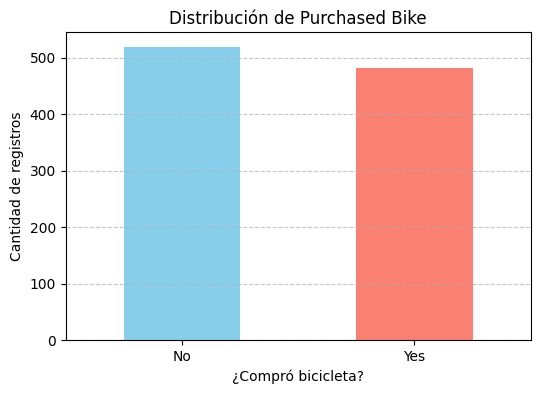

In [73]:
# Crea el gráfico
plt.figure(figsize=(6, 4))
value_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Purchased Bike')
plt.xlabel('¿Compró bicicleta?')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Distribución de Income, Age y Children

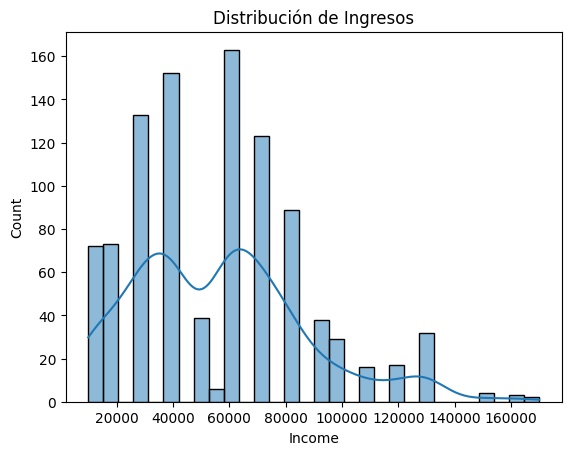

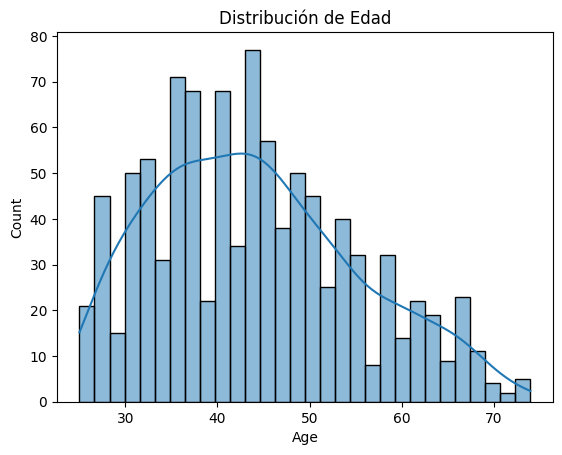

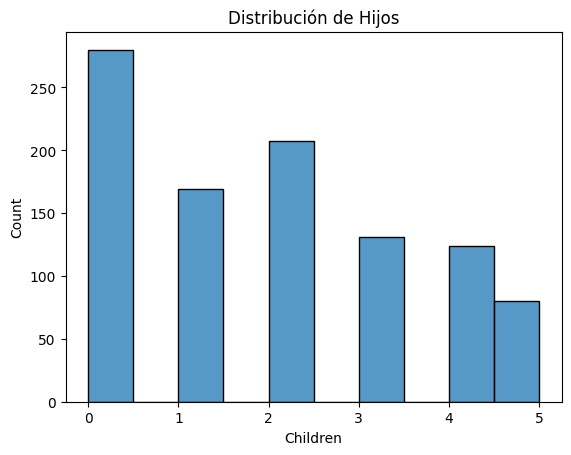

In [74]:
# Income
sns.histplot(bike_buyers['Income'], kde=True, bins=30)
plt.title('Distribución de Ingresos')
plt.show()

# Age
sns.histplot(bike_buyers['Age'], kde=True, bins=30)
plt.title('Distribución de Edad')
plt.show()

# Children
sns.histplot(bike_buyers['Children'], kde=False, bins=10)
plt.title('Distribución de Hijos')
plt.show()


## Boxplots para ver outliers

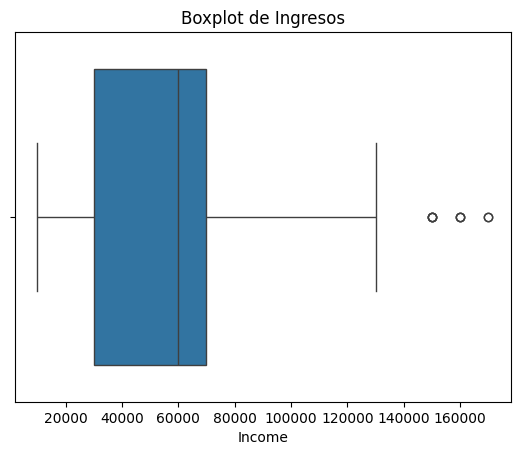

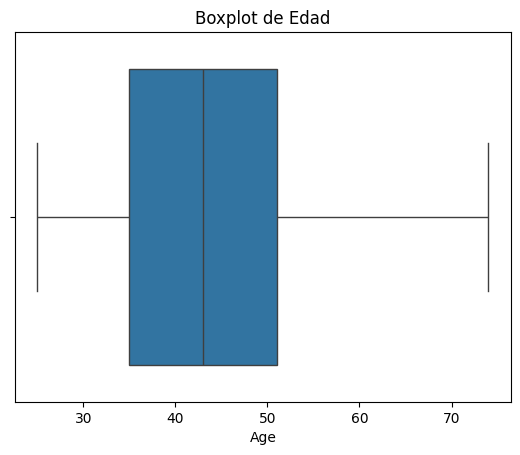

In [75]:
# Income
sns.boxplot(x=bike_buyers['Income'])
plt.title('Boxplot de Ingresos')
plt.show()

# Age
sns.boxplot(x=bike_buyers['Age'])
plt.title('Boxplot de Edad')
plt.show()


## Variables categóricas (Marital Status, Gender, Home Owner, Region)

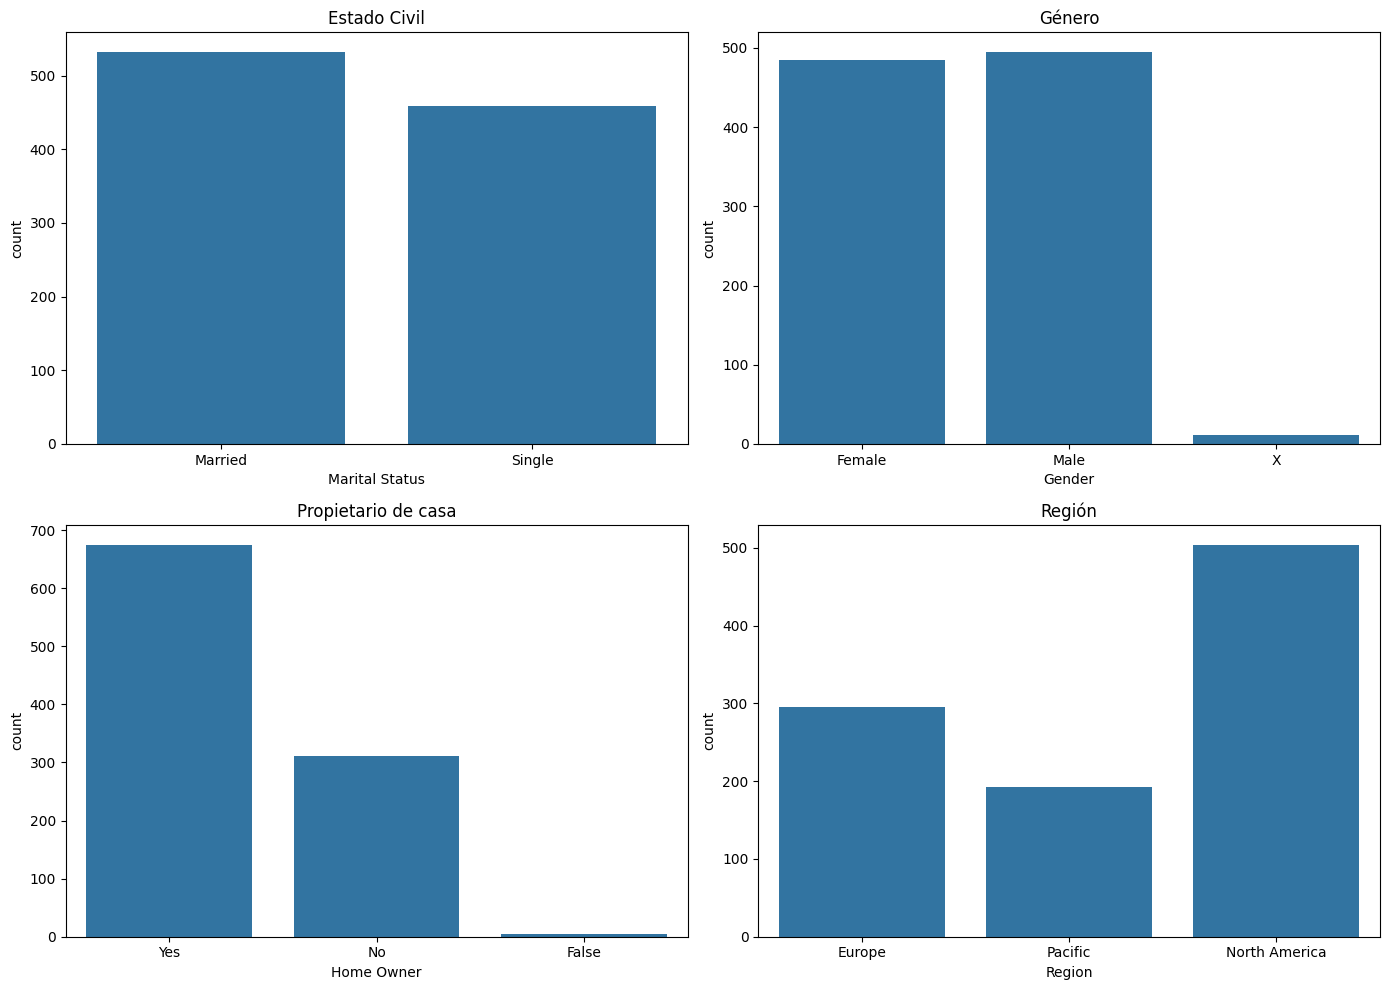

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=bike_buyers, x='Marital Status', ax=axes[0,0])
axes[0,0].set_title('Estado Civil')

sns.countplot(data=bike_buyers, x='Gender', ax=axes[0,1])
axes[0,1].set_title('Género')

sns.countplot(data=bike_buyers, x='Home Owner', ax=axes[1,0])
axes[1,0].set_title('Propietario de casa')

sns.countplot(data=bike_buyers, x='Region', ax=axes[1,1])
axes[1,1].set_title('Región')

plt.tight_layout()
plt.show()


## ¿Income afecta la compra?

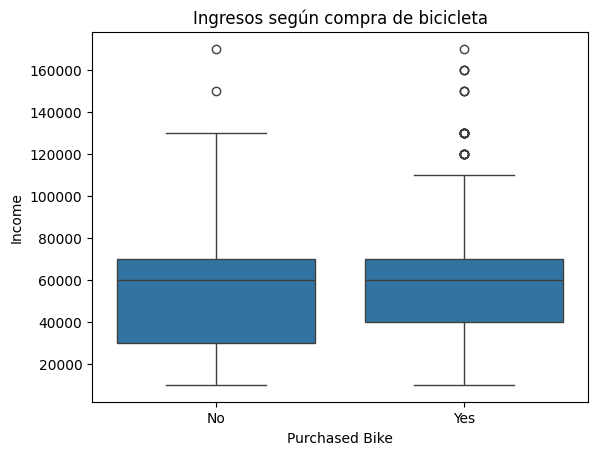

In [77]:
sns.boxplot(data=bike_buyers, x='Purchased Bike', y='Income')
plt.title('Ingresos según compra de bicicleta')
plt.show()


## Matriz de Correlacion de variables **numericas**

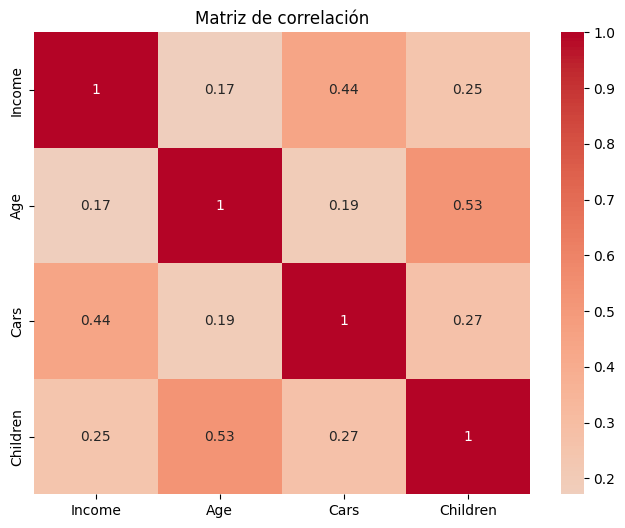

In [78]:
# Solo las numéricas
corr = bike_buyers[['Income', 'Age', 'Cars', 'Children']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()
